In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from recognize_word import *

In [2]:
path = 'word-images/word5.png'
word = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [3]:
kernel = np.ones((5,5),np.uint8)
_, word = cv2.threshold(word,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
word = 255 - word
#word = cv2.morphologyEx(word, cv2.MORPH_OPEN, kernel)
#word = cv2.erode(word,kernel,iterations = 1)
word = 255 - word

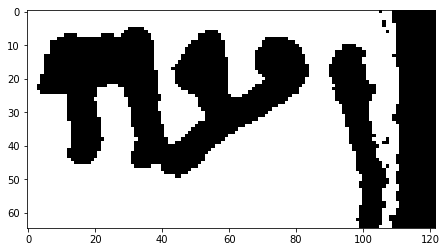

In [4]:
plt.figure(figsize = (500,4))
plt.imshow(word, cmap='gray', aspect = 1)
plt.show()

In [5]:
#recognition = recognize_word(word)
#print("The best matching word is:", recognition)
height, width = word.shape
height,width

(65, 122)

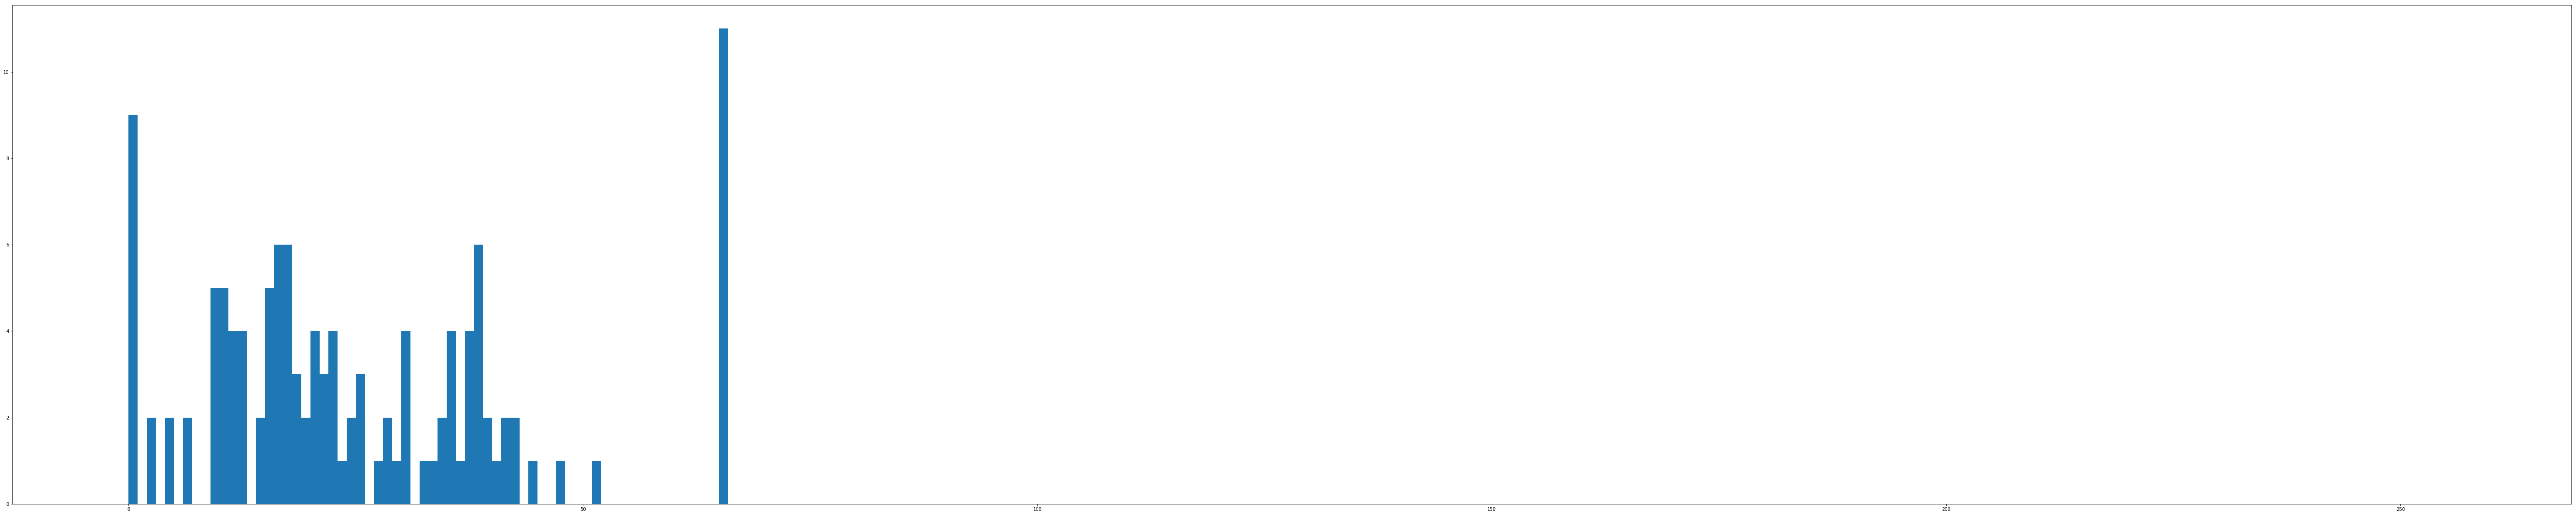

In [6]:
histogram = np.zeros(width)
# count black pixels for every column of the word image
for i in range(width):
    histogram[i] = height - np.count_nonzero(word[:, i])
plt.figure(figsize = (100,20))
plt.hist(histogram,256,[0,256])
plt.show()

65.0 0.0 24.9098360656 17.5377831461


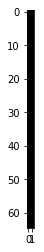

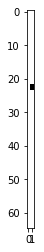

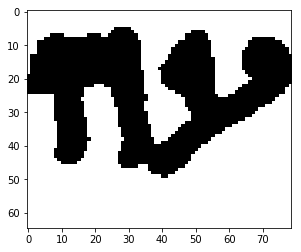

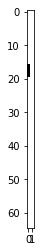

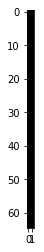

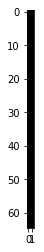

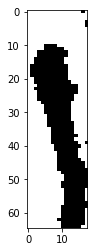

In [8]:
# segment word into characters based on histogram values
mx = max(histogram)
mn = min(histogram)
avg = np.mean(histogram)
std = np.std(histogram)
print(mx,mn,avg,std)

split_start = 0
split_end = 0
for i in range(len(histogram)):
    # find a low point in the histogram
    if(histogram[i] == mn or histogram[i] <= (avg - (std))):
        split_end = i
    # if distance between the two points is large enough, make the split
    if((split_end - split_start) > 5):
        character = word[:, split_start:split_end]
        plt.figure(figsize = (500,4))
        plt.imshow(character, cmap='gray', aspect = 1)
        plt.show()
        split_start = i
        
        
        
        
        
        


    